# Comparing fit results for EN1 galaxies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time
start_time=time()

## Opening file and reading data onto a dataframe

In [2]:
# Selecting columns to read:
columns = ['ID_1','z','zmodel_1','Mass_best','SFR_best','chi_best_1','Dust_best','Mass_median_1','SFR_median','Nfilts_1','Z_BEST','zmodel_2','chi_best_2','Mass_median_2','Nfilts_2']
start_time1 = time()
# Reading the data:
en1 = pd.read_csv('/home/bruno/Documents/COSMOamautas/Data/en1_matched_tables.csv',usecols=columns)
end_time1 = time()
print(f"Creating dataframe took {end_time1-start_time1:.4g} seconds!")

Creating dataframe took 18.4 seconds!


In [3]:
en1.info()
print(f"Number of galaxies in catalogue: {len(en1)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586043 entries, 0 to 586042
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID_1           586043 non-null  int64  
 1   z              586043 non-null  float64
 2   zmodel_1       586043 non-null  float64
 3   Mass_best      578827 non-null  float64
 4   SFR_best       578928 non-null  float64
 5   chi_best_1     586043 non-null  float64
 6   Dust_best      586043 non-null  float64
 7   Mass_median_1  370024 non-null  float64
 8   SFR_median     520508 non-null  float64
 9   Nfilts_1       586043 non-null  int64  
 10  Z_BEST         586043 non-null  float64
 11  zmodel_2       586024 non-null  float64
 12  chi_best_2     586024 non-null  float64
 13  Mass_median_2  548703 non-null  float64
 14  Nfilts_2       586024 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 67.1 MB
Number of galaxies in catalogue: 586043


## Notes about the columns in the matched table:

#### Fields with suffix _1_ are from the new fit
#### Fields with suffix _2_ are from the original catalog

#### zmodel refers to the model grid redshift used in the stellar mass fit

#### Mass_median is the median of the marginalised posterior for Z_BEST

#### The meaning of z is unclear
#### The meaning of Mass_best is unclear

In [4]:
print(np.count_nonzero(~np.isfinite(en1['Mass_median_2'])))
print(np.count_nonzero(~np.isfinite(en1['Mass_median_1'])))
print(np.count_nonzero(~np.isfinite(en1['Mass_best'])))

37345
216433
7216


In [5]:
pd.options.mode.use_inf_as_na = True
en1.dropna(subset=['Mass_median_1','Mass_median_2'],inplace=True)
print(f"Number of galaxies in sample: {len(en1)}")

Number of galaxies in sample: 355674


## Redshift distribution

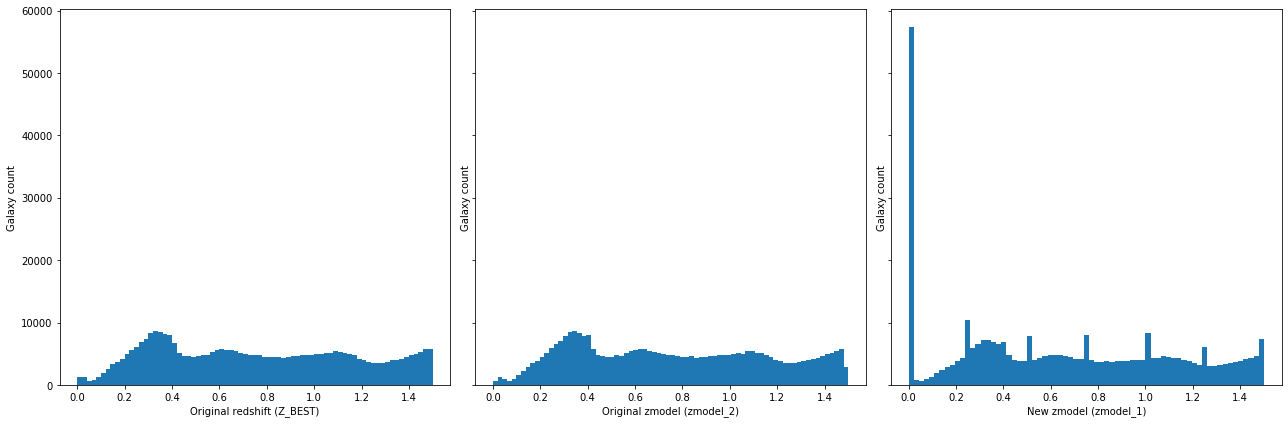

In [6]:
fig, ax = plt.subplots(1,3,figsize=(18,6),sharey='row')
ax[0].set_xlabel('Original redshift (Z_BEST)')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(en1['Z_BEST'], 'auto')
ax[1].set_xlabel('Original zmodel (zmodel_2)')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(en1['zmodel_2'], 'auto')
ax[2].set_xlabel('New zmodel (zmodel_1)')
ax[2].set_ylabel('Galaxy count')
ax[2].hist(en1['zmodel_1'], 'auto')
fig.tight_layout()
plt.show()

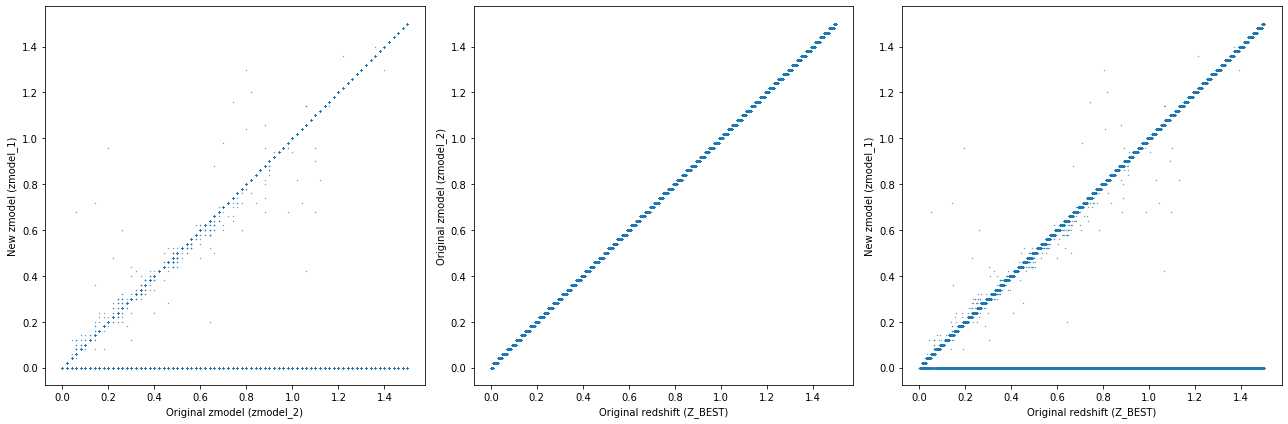

In [7]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].set_xlabel("Original zmodel (zmodel_2)",fontsize=10)
ax[0].set_ylabel("New zmodel (zmodel_1)",fontsize=10)
ax[0].scatter(en1['zmodel_2'],en1['zmodel_1'],s=0.1,label='EN1 field data')
ax[1].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[1].set_ylabel("Original zmodel (zmodel_2)",fontsize=10)
ax[1].scatter(en1['Z_BEST'],en1['zmodel_2'],s=0.1,label='EN1 field data')
ax[2].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[2].set_ylabel("New zmodel (zmodel_1)",fontsize=10)
ax[2].scatter(en1['Z_BEST'],en1['zmodel_1'],s=0.1,label='EN1 field data')
fig.tight_layout()
plt.show()

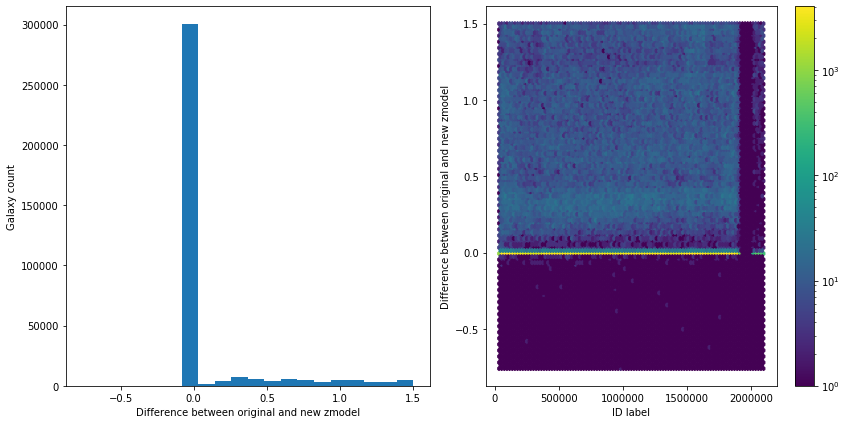

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_xlabel('Difference between original and new zmodel')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(en1['zmodel_2']-en1['zmodel_1'], 'auto')
ax[1].set_xlabel("ID label",fontsize=10)
ax[1].set_ylabel("Difference between original and new zmodel",fontsize=10)
hb = ax[1].hexbin(en1['ID_1'],en1['zmodel_2']-en1['zmodel_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
fig.tight_layout()
plt.show()

## Stellar mass distribution

/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


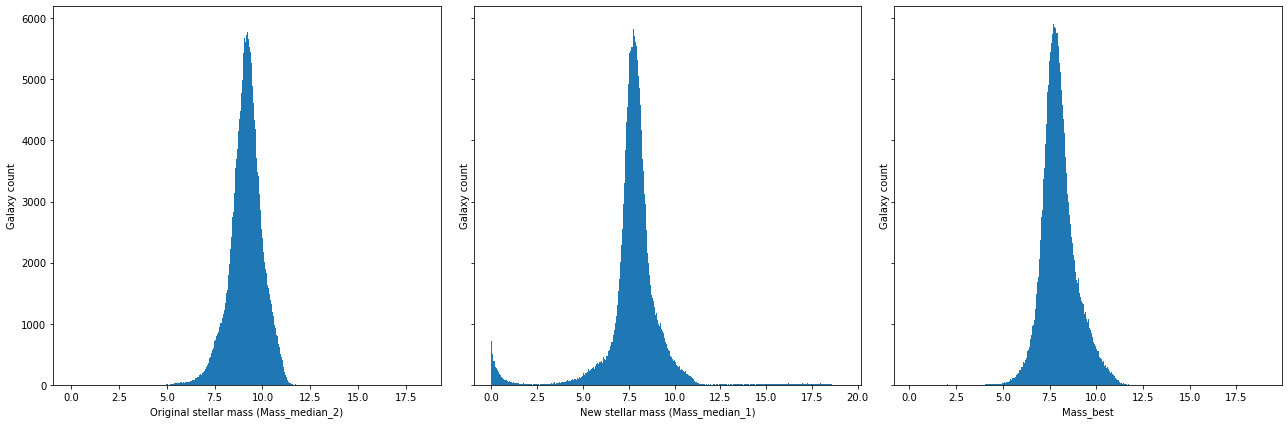

In [13]:
fig, ax = plt.subplots(1,3,figsize=(18,6),sharey='row')
ax[0].set_xlabel('Original stellar mass (Mass_median_2)')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(en1['Mass_median_2'], 'auto')
ax[1].set_xlabel('New stellar mass (Mass_median_1)')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(en1['Mass_median_1'], 'auto')
ax[2].set_xlabel('Mass_best')
ax[2].set_ylabel('Galaxy count')
ax[2].hist(en1['Mass_best'], 'auto')
fig.tight_layout()
plt.show()

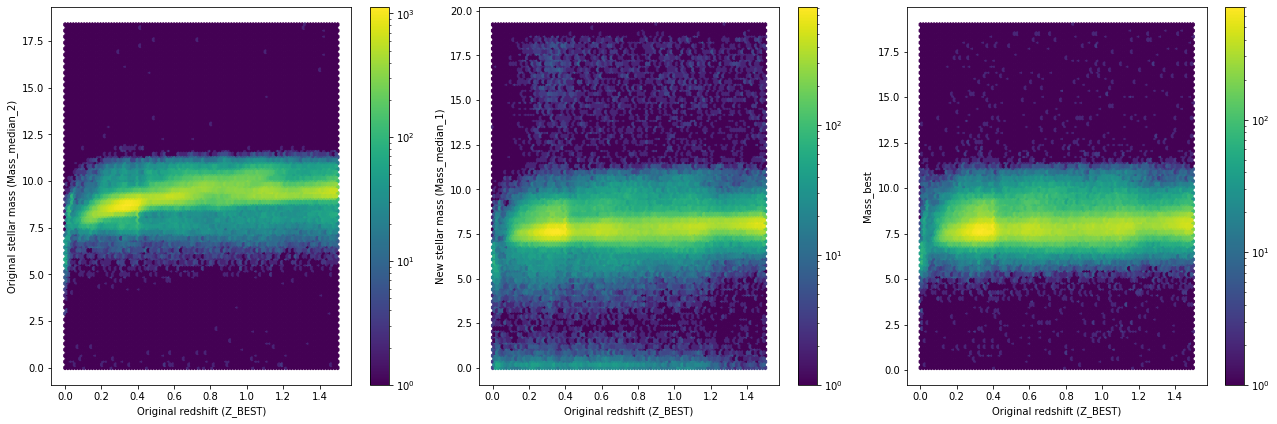

In [14]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[0].set_ylabel("Original stellar mass (Mass_median_2)",fontsize=10)
hb = ax[0].hexbin(en1['Z_BEST'],en1['Mass_median_2'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[1].set_ylabel("New stellar mass (Mass_median_1)",fontsize=10)
hb = ax[1].hexbin(en1['Z_BEST'],en1['Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
ax[2].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[2].set_ylabel("Mass_best",fontsize=10)
hb = ax[2].hexbin(en1['Z_BEST'],en1['Mass_best'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[2])
fig.tight_layout()
plt.show()

## New vs original stellar mass

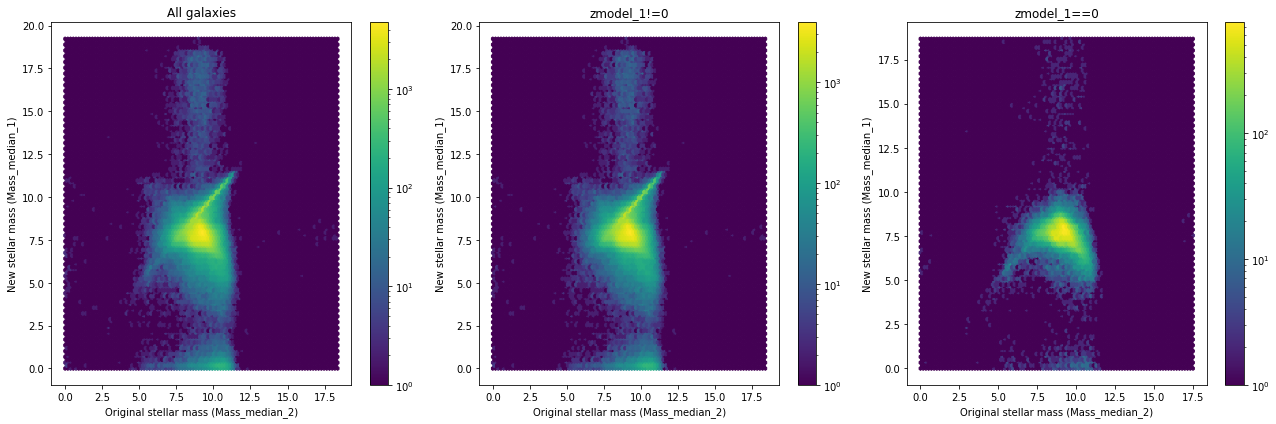

In [15]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].set_title('All galaxies')
ax[0].set_xlabel("Original stellar mass (Mass_median_2)",fontsize=10)
ax[0].set_ylabel("New stellar mass (Mass_median_1)",fontsize=10)
hb = ax[0].hexbin(en1['Mass_median_2'],en1['Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_title('zmodel_1!=0')
ax[1].set_xlabel("Original stellar mass (Mass_median_2)",fontsize=10)
ax[1].set_ylabel("New stellar mass (Mass_median_1)",fontsize=10)
hb = ax[1].hexbin(en1.query('zmodel_1!=0').loc[:,'Mass_median_2'],en1.query('zmodel_1!=0').loc[:,'Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
ax[2].set_title('zmodel_1==0')
ax[2].set_xlabel("Original stellar mass (Mass_median_2)",fontsize=10)
ax[2].set_ylabel("New stellar mass (Mass_median_1)",fontsize=10)
hb = ax[2].hexbin(en1.query('zmodel_1==0').loc[:,'Mass_median_2'],en1.query('zmodel_1==0').loc[:,'Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[2])
fig.tight_layout()
plt.show()

## Difference between original and new stellar mass

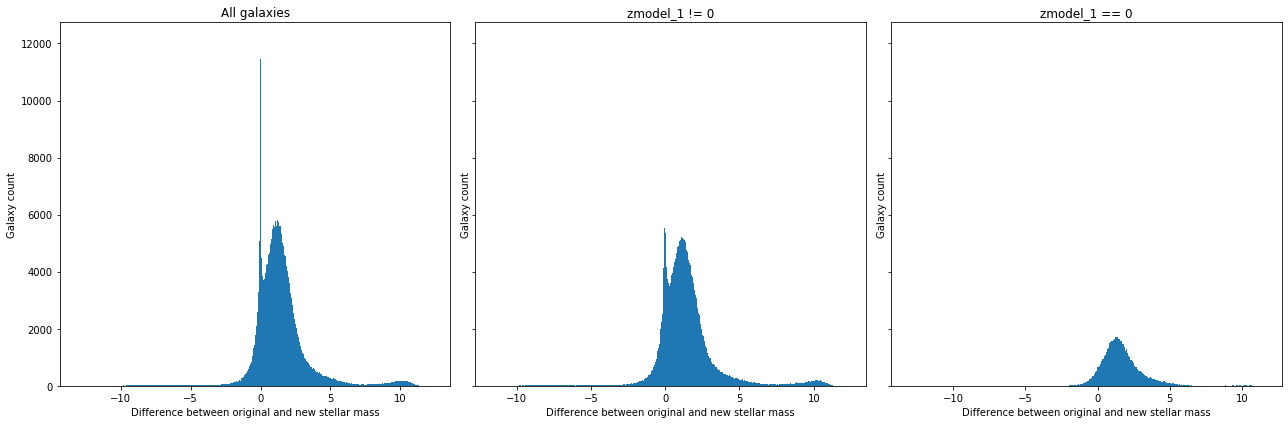

In [16]:
fig, ax = plt.subplots(1,3,figsize=(18,6),sharey='row')
ax[0].set_title('All galaxies')
ax[0].set_xlabel('Difference between original and new stellar mass')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(en1['Mass_median_2']-en1['Mass_median_1'], 'auto')
ax[1].set_title('zmodel_1 != 0')
ax[1].set_xlabel('Difference between original and new stellar mass')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(en1.query('zmodel_1!=0').loc[:,'Mass_median_2']-en1.query('zmodel_1!=0').loc[:,'Mass_median_1'], 'auto')
ax[2].set_title('zmodel_1 == 0')
ax[2].set_xlabel('Difference between original and new stellar mass')
ax[2].set_ylabel('Galaxy count')
ax[2].hist(en1.query('zmodel_1==0').loc[:,'Mass_median_2']-en1.query('zmodel_1==0').loc[:,'Mass_median_1'], 'auto')
fig.tight_layout()
plt.show()


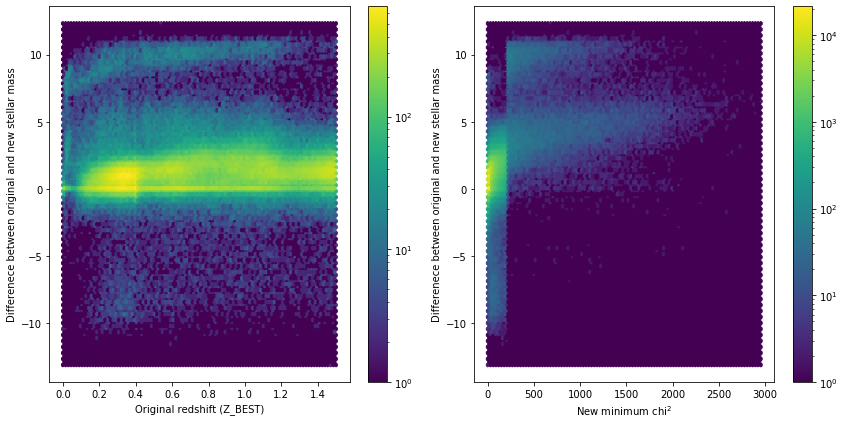

In [17]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[0].set_ylabel("Differenece between original and new stellar mass",fontsize=10)
hb = ax[0].hexbin(en1['Z_BEST'],en1['Mass_median_2']-en1['Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("New minimum chi$^2$",fontsize=10)
ax[1].set_ylabel("Differenece between original and new stellar mass",fontsize=10)
hb = ax[1].hexbin(en1['chi_best_1'],en1['Mass_median_2']-en1['Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
fig.tight_layout()
plt.show()

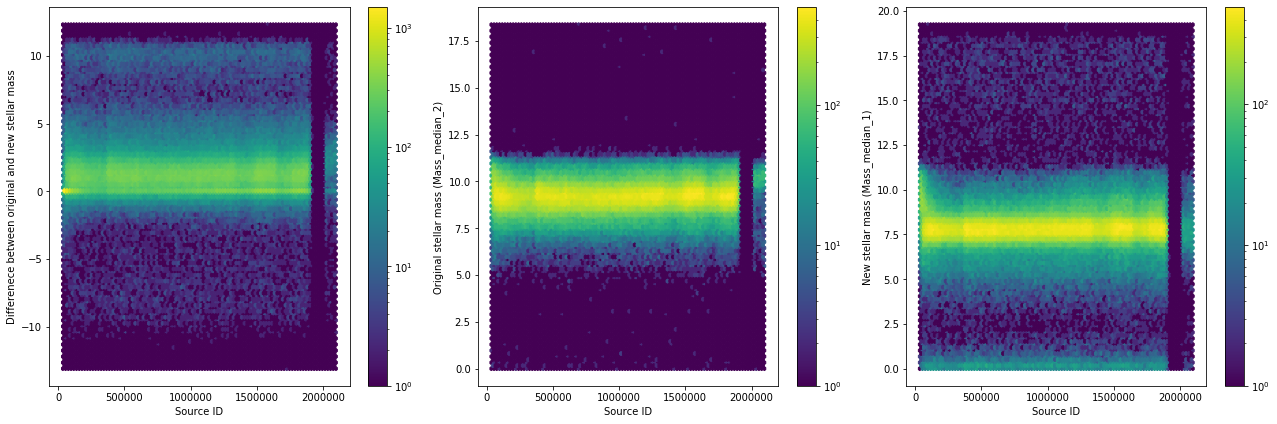

In [19]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].set_xlabel("Source ID",fontsize=10)
ax[0].set_ylabel("Differenece between original and new stellar mass",fontsize=10)
hb = ax[0].hexbin(en1['ID_1'],en1['Mass_median_2']-en1['Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("Source ID",fontsize=10)
ax[1].set_ylabel("Original stellar mass (Mass_median_2)",fontsize=10)
hb = ax[1].hexbin(en1['ID_1'],en1['Mass_median_2'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
ax[2].set_xlabel("Source ID",fontsize=10)
ax[2].set_ylabel("New stellar mass (Mass_median_1)",fontsize=10)
hb = ax[2].hexbin(en1['ID_1'],en1['Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[2])
fig.tight_layout()
plt.show()

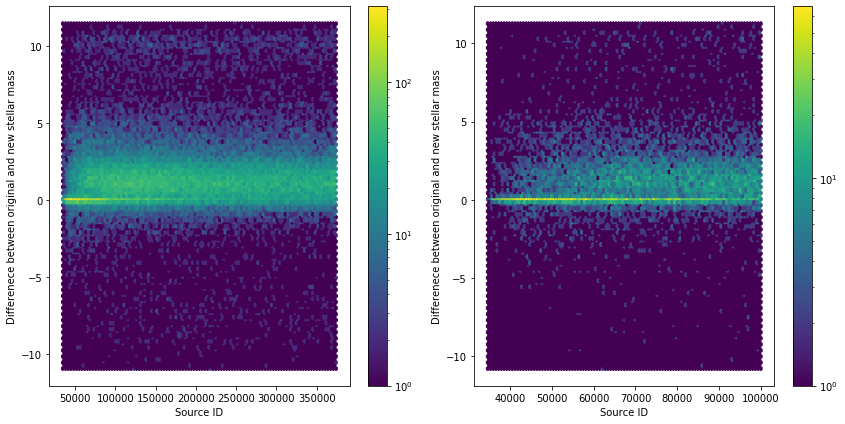

In [22]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_xlabel("Source ID",fontsize=10)
ax[0].set_ylabel("Differenece between original and new stellar mass",fontsize=10)
hb = ax[0].hexbin(en1.loc[:100000,'ID_1'],en1.loc[:100000,'Mass_median_2']-en1.loc[:100000,'Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("Source ID",fontsize=10)
ax[1].set_ylabel("Differenece between original and new stellar mass",fontsize=10)
hb = ax[1].hexbin(en1.query('ID_1<100000').loc[:,'ID_1'],en1.query('ID_1<100000').loc[:,'Mass_median_2']-en1.query('ID_1<100000').loc[:,'Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
fig.tight_layout()
plt.show()

## Chi$^2$ distribution

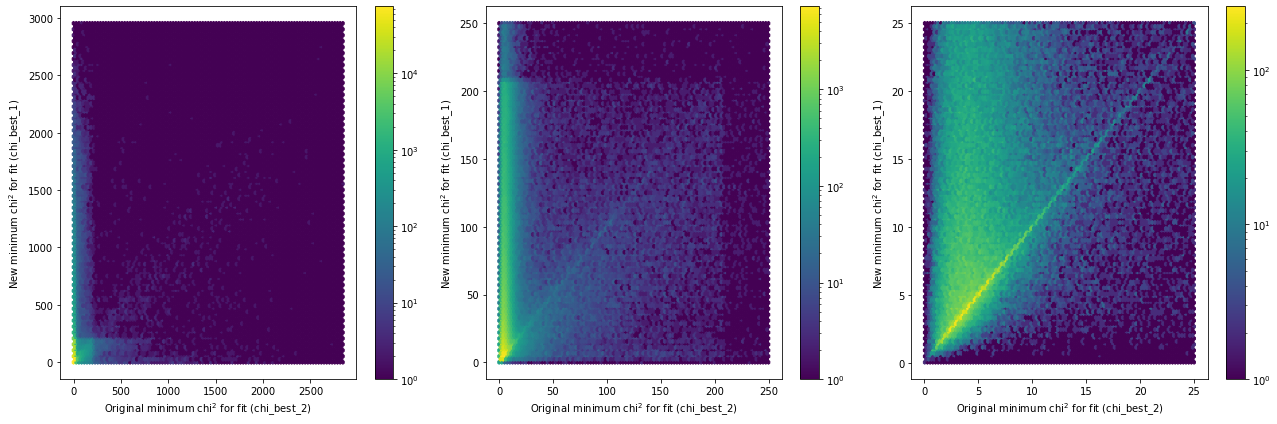

In [23]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].set_xlabel("Original minimum chi$^2$ for fit (chi_best_2)",fontsize=10)
ax[0].set_ylabel("New minimum chi$^2$ for fit (chi_best_1)",fontsize=10)
hb = ax[0].hexbin(en1['chi_best_2'],en1['chi_best_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("Original minimum chi$^2$ for fit (chi_best_2)",fontsize=10)
ax[1].set_ylabel("New minimum chi$^2$ for fit (chi_best_1)",fontsize=10)
hb = ax[1].hexbin(en1.query('(chi_best_2<250)&(chi_best_1<250)').loc[:,'chi_best_2'],en1.query('(chi_best_2<250)&(chi_best_1<250)').loc[:,'chi_best_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
ax[2].set_xlabel("Original minimum chi$^2$ for fit (chi_best_2)",fontsize=10)
ax[2].set_ylabel("New minimum chi$^2$ for fit (chi_best_1)",fontsize=10)
hb = ax[2].hexbin(en1.query('(chi_best_2<25)&(chi_best_1<25)').loc[:,'chi_best_2'],en1.query('(chi_best_2<25)&(chi_best_1<25)').loc[:,'chi_best_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[2])
fig.tight_layout()
plt.show()

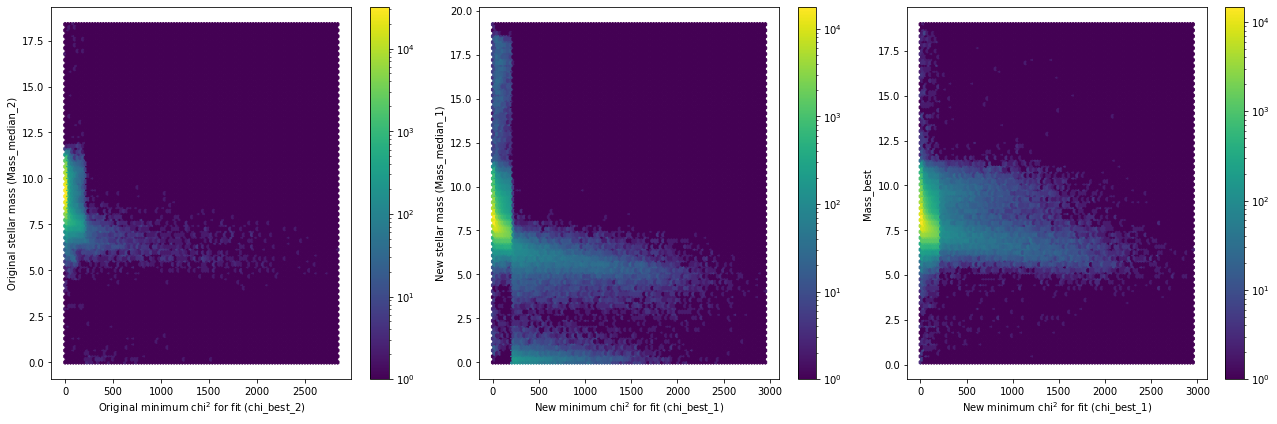

In [24]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].set_xlabel("Original minimum chi$^2$ for fit (chi_best_2)",fontsize=10)
ax[0].set_ylabel("Original stellar mass (Mass_median_2)",fontsize=10)
hb = ax[0].hexbin(en1['chi_best_2'],en1['Mass_median_2'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("New minimum chi$^2$ for fit (chi_best_1)",fontsize=10)
ax[1].set_ylabel("New stellar mass (Mass_median_1)",fontsize=10)
hb = ax[1].hexbin(en1['chi_best_1'],en1['Mass_median_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
ax[2].set_xlabel("New minimum chi$^2$ for fit (chi_best_1)",fontsize=10)
ax[2].set_ylabel("Mass_best",fontsize=10)
hb = ax[2].hexbin(en1['chi_best_1'],en1['Mass_best'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[2])
fig.tight_layout()
plt.show()

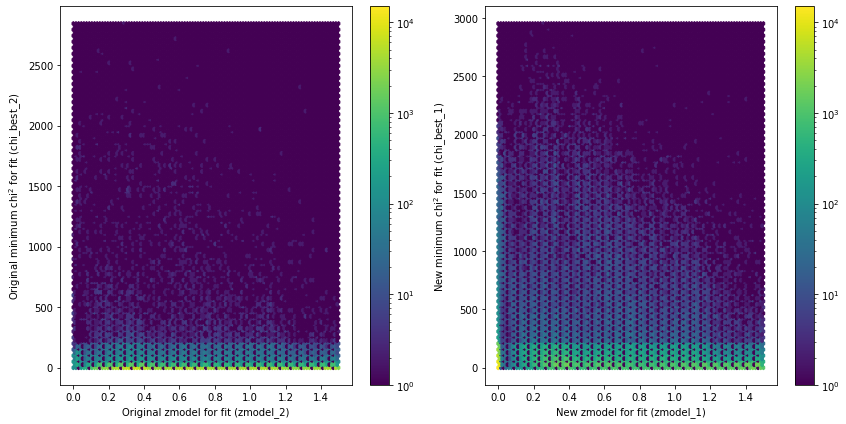

In [25]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_xlabel("Original zmodel for fit (zmodel_2)",fontsize=10)
ax[0].set_ylabel("Original minimum chi$^2$ for fit (chi_best_2)",fontsize=10)
hb = ax[0].hexbin(en1['zmodel_2'],en1['chi_best_2'],bins='log',label='EN1 field data',vmax=15000)
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("New zmodel for fit (zmodel_1)",fontsize=10)
ax[1].set_ylabel("New minimum chi$^2$ for fit (chi_best_1)",fontsize=10)
hb = ax[1].hexbin(en1['zmodel_1'],en1['chi_best_1'],bins='log',label='EN1 field data',vmax=15000)
cb = fig.colorbar(hb, ax=ax[1])
fig.tight_layout()
plt.show()

## Number of bands used in fits

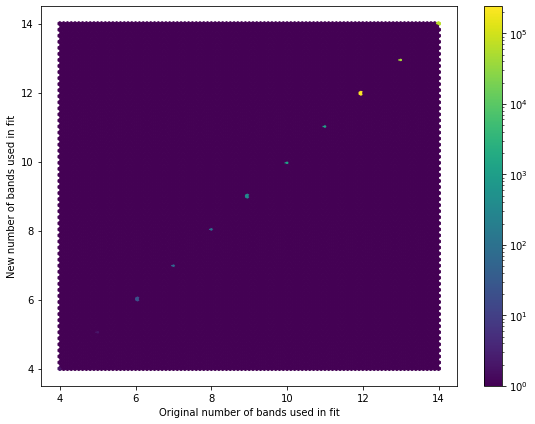

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Original number of bands used in fit",fontsize=10)
ax.set_ylabel("New number of bands used in fit",fontsize=10)
hb = ax.hexbin(en1['Nfilts_2'],en1['Nfilts_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax)
fig.tight_layout()
plt.show()

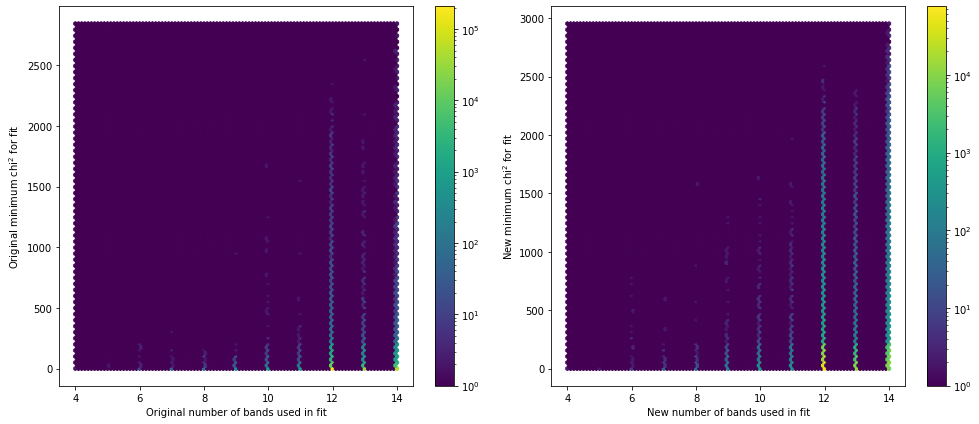

In [27]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].set_xlabel("Original number of bands used in fit",fontsize=10)
ax[0].set_ylabel("Original minimum chi$^2$ for fit",fontsize=10)
hb = ax[0].hexbin(en1['Nfilts_2'],en1['chi_best_2'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[0])
ax[1].set_xlabel("New number of bands used in fit",fontsize=10)
ax[1].set_ylabel("New minimum chi$^2$ for fit",fontsize=10)
hb = ax[1].hexbin(en1['Nfilts_1'],en1['chi_best_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
fig.tight_layout()
plt.show()

## Z_BEST vs z

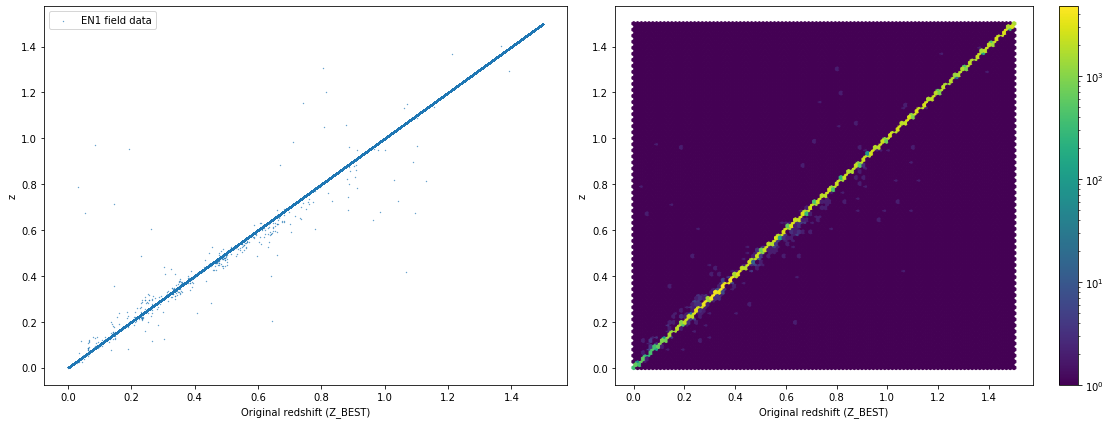

In [28]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[0].set_ylabel("z",fontsize=10)
ax[0].scatter(en1['Z_BEST'],en1['z'],s=0.1,label='EN1 field data')
ax[0].legend(numpoints=1, loc='best')
ax[1].set_xlabel("Original redshift (Z_BEST)",fontsize=10)
ax[1].set_ylabel("z",fontsize=10)
hb = ax[1].hexbin(en1['Z_BEST'],en1['z'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
fig.tight_layout()
plt.show()

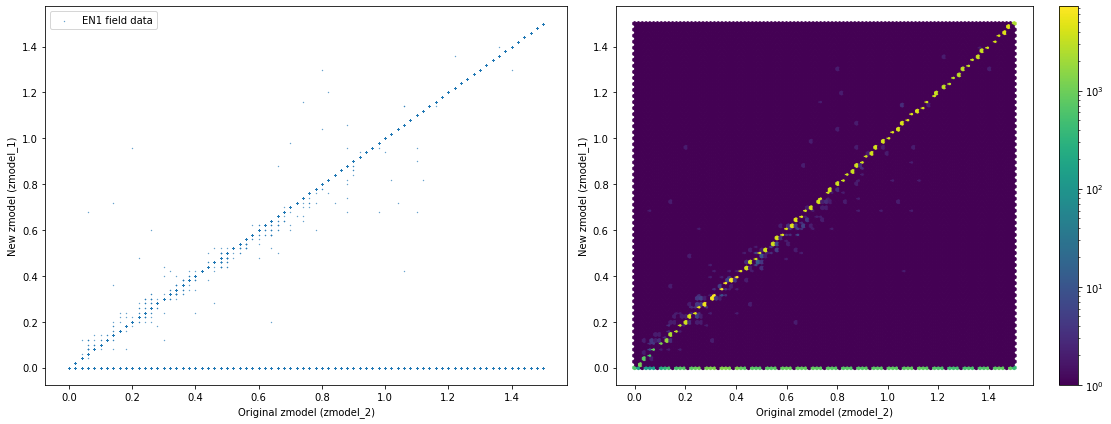

In [112]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].set_xlabel("Original zmodel (zmodel_2)",fontsize=10)
ax[0].set_ylabel("New zmodel (zmodel_1)",fontsize=10)
ax[0].scatter(en1['zmodel_2'],en1['zmodel_1'],s=0.1,label='EN1 field data')
ax[0].legend(numpoints=1, loc='best')
ax[1].set_xlabel("Original zmodel (zmodel_2)",fontsize=10)
ax[1].set_ylabel("New zmodel (zmodel_1)",fontsize=10)
hb = ax[1].hexbin(en1['zmodel_2'],en1['zmodel_1'],bins='log',label='EN1 field data')
cb = fig.colorbar(hb, ax=ax[1])
fig.tight_layout()
plt.show()

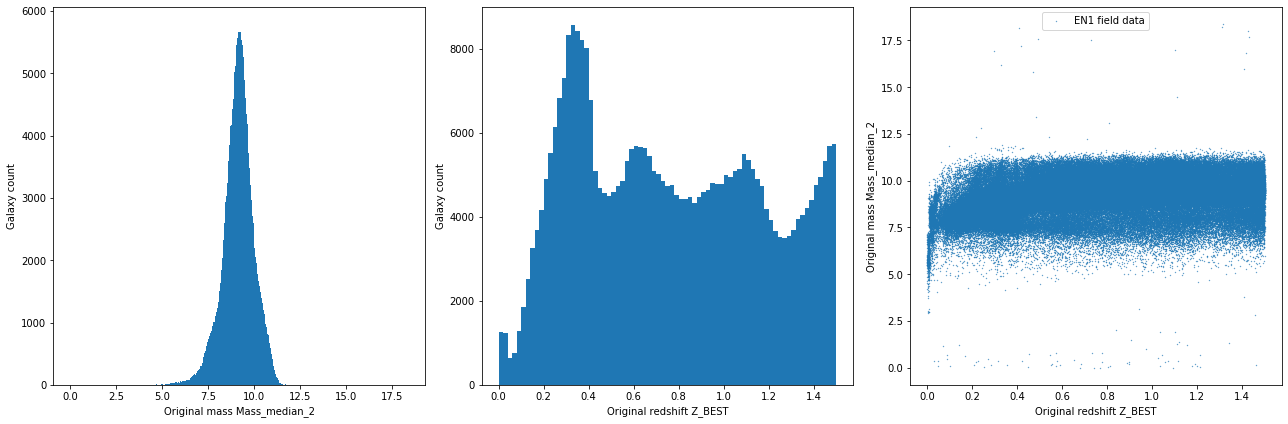

In [7]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
# Plotting stellar mass histogram
#ax[0].set_title('Distribution of stellar mass for galaxies in EN1 field')
ax[0].set_xlabel('Original mass Mass_median_2')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(en1['Mass_median_2'], 'auto')
# Plotting redshift histogram
#ax[1].set_title('Distribution of redshift for galaxies in EN1 field')
ax[1].set_xlabel('Original redshift Z_BEST')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(en1['Z_BEST'], 'auto')
# Plotting Stellar mass vs Redshift
#ax[2].set_title('Redshift and stellar mass distribution for galaxies in EN1 field')
ax[2].set_xlabel("Original redshift Z_BEST",fontsize=10)
ax[2].set_ylabel("Original mass Mass_median_2",fontsize=10)
ax[2].scatter(en1['Z_BEST'],en1['Mass_median_2'],s=0.1,label='EN1 field data')
ax[2].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

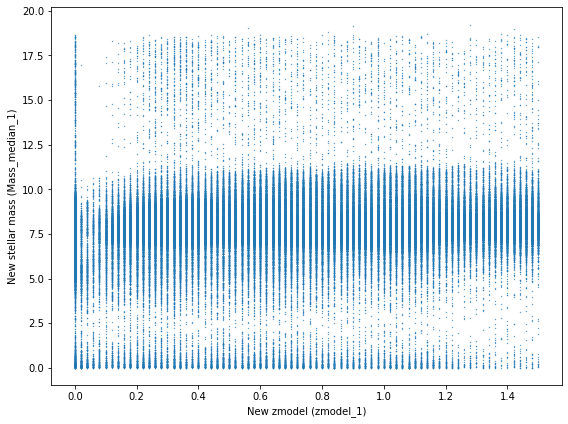

In [85]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("New zmodel (zmodel_1)",fontsize=10)
ax.set_ylabel("New stellar mass (Mass_median_1)",fontsize=10)
ax.scatter(en1['zmodel_1'],en1['Mass_median_1'],s=0.1,label='EN1 field data')

fig.tight_layout()
plt.show()